In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

Using Theano backend.


In [2]:
import theano

In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

In [4]:
type(input_img)

theano.tensor.var.TensorVariable

In [5]:
input_img

/input_1

In [6]:
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded) # You can use softmax also 

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [7]:
encoder = Model(input_img, encoded)

In [8]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [30]:
decoder.layers[0].get_config()

{'batch_input_shape': (None, 32),
 'dtype': 'float32',
 'name': 'input_2',
 'sparse': False}

In [20]:
autoencoder.layers[0].get_config()

{'batch_input_shape': (None, 784),
 'dtype': 'float32',
 'name': 'input_1',
 'sparse': False}

In [21]:
autoencoder.layers[1].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_1',
 'trainable': True,
 'units': 32,
 'use_bias': True}

In [22]:
autoencoder.layers[2].get_config()

{'activation': 'sigmoid',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_2',
 'trainable': True,
 'units': 784,
 'use_bias': True}

In [31]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [32]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 111s   


In [35]:
x_train.max()

255

In [37]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [38]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s - loss: 0.3677 - val_loss: 0.2715
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.2632 - val_loss: 0.2513
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.2415 - val_loss: 0.2298
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.2225 - val_loss: 0.2126
Epoch 5/50
60000/60000 [==============================] - 5s - loss: 0.2074 - val_loss: 0.1997
Epoch 6/50
60000/60000 [==============================] - 5s - loss: 0.1962 - val_loss: 0.1903
Epoch 7/50
60000/60000 [==============================] - 5s - loss: 0.1878 - val_loss: 0.1827
Epoch 8/50
60000/60000 [==============================] - 5s - loss: 0.1808 - val_loss: 0.1762
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1747 - val_loss: 0.1704
Epoch 10/50
60000/60000 [==============================] - 5s - loss: 0.1692 - val_loss: 0.1653

In [39]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

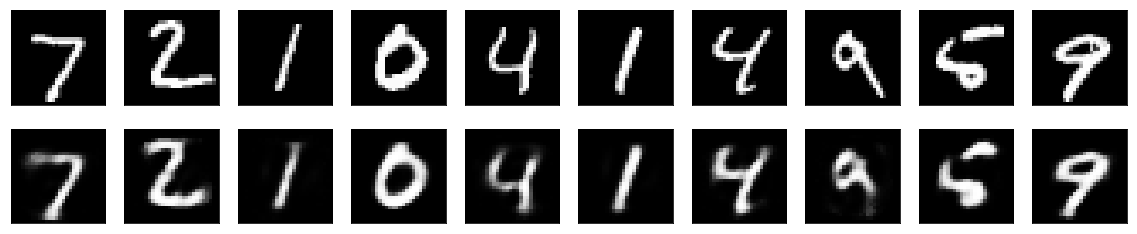

In [40]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [41]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [43]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s - loss: 0.6836 - val_loss: 0.6607
Epoch 2/100
60000/60000 [==============================] - 5s - loss: 0.6440 - val_loss: 0.6272
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.6111 - val_loss: 0.5952
Epoch 4/100
60000/60000 [==============================] - 4s - loss: 0.5802 - val_loss: 0.5655
Epoch 5/100
60000/60000 [==============================] - 5s - loss: 0.5518 - val_loss: 0.5386
Epoch 6/100
60000/60000 [==============================] - 5s - loss: 0.5263 - val_loss: 0.5146
Epoch 7/100
60000/60000 [==============================] - 5s - loss: 0.5036 - val_loss: 0.4932
Epoch 8/100
60000/60000 [==============================] - 5s - loss: 0.4835 - val_loss: 0.4744
Epoch 9/100
60000/60000 [==============================] - 4s - loss: 0.4658 - val_loss: 0.4577
Epoch 10/100
60000/60000 [==============================] - 4s - loss: 0.4501 - val_lo

60000/60000 [==============================] - 5s - loss: 0.2807 - val_loss: 0.2806
Epoch 86/100
60000/60000 [==============================] - 5s - loss: 0.2805 - val_loss: 0.2803
Epoch 87/100
60000/60000 [==============================] - 5s - loss: 0.2802 - val_loss: 0.2801
Epoch 88/100
60000/60000 [==============================] - 5s - loss: 0.2800 - val_loss: 0.2798
Epoch 89/100
60000/60000 [==============================] - 5s - loss: 0.2798 - val_loss: 0.2796
Epoch 90/100
60000/60000 [==============================] - 5s - loss: 0.2795 - val_loss: 0.2794
Epoch 91/100
60000/60000 [==============================] - 5s - loss: 0.2793 - val_loss: 0.2792
Epoch 92/100
60000/60000 [==============================] - 5s - loss: 0.2791 - val_loss: 0.2789
Epoch 93/100
60000/60000 [==============================] - 5s - loss: 0.2789 - val_loss: 0.2787
Epoch 94/100
60000/60000 [==============================] - 5s - loss: 0.2787 - val_loss: 0.2785
Epoch 95/100
60000/60000 [=================

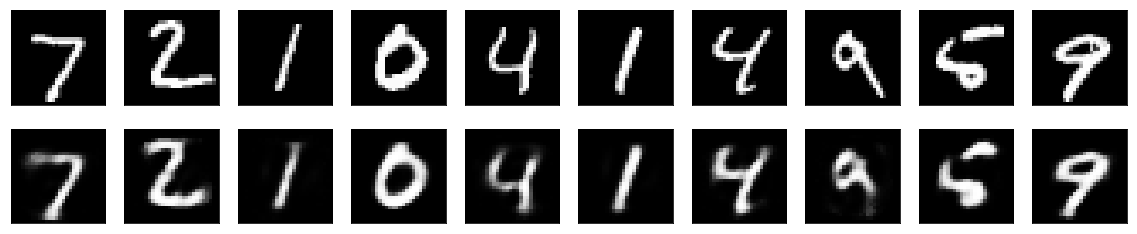

In [44]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [45]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s - loss: 0.3717 - val_loss: 0.2642
Epoch 2/100
60000/60000 [==============================] - 7s - loss: 0.2601 - val_loss: 0.2558
Epoch 3/100
60000/60000 [==============================] - 6s - loss: 0.2471 - val_loss: 0.2366
Epoch 4/100
60000/60000 [==============================] - 7s - loss: 0.2291 - val_loss: 0.2228
Epoch 5/100
60000/60000 [==============================] - 6s - loss: 0.2194 - val_loss: 0.2117
Epoch 6/100
60000/60000 [==============================] - 6s - loss: 0.2066 - val_loss: 0.1997
Epoch 7/100
60000/60000 [==============================] - 6s - loss: 0.1953 - val_loss: 0.1895
Epoch 8/100
60000/60000 [==============================] - 6s - loss: 0.1840 - val_loss: 0.1796
Epoch 9/100
60000/60000 [==============================] - 6s - loss: 0.1777 - val_loss: 0.1755
Epoch 10/100
60000/60000 [==============================] - 6s - loss: 0.1731 - val_lo

60000/60000 [==============================] - 6s - loss: 0.1045 - val_loss: 0.1031
Epoch 86/100
60000/60000 [==============================] - 6s - loss: 0.1043 - val_loss: 0.1028
Epoch 87/100
60000/60000 [==============================] - 6s - loss: 0.1040 - val_loss: 0.1033
Epoch 88/100
60000/60000 [==============================] - 6s - loss: 0.1038 - val_loss: 0.1031
Epoch 89/100
60000/60000 [==============================] - 6s - loss: 0.1036 - val_loss: 0.1023
Epoch 90/100
60000/60000 [==============================] - 6s - loss: 0.1034 - val_loss: 0.1028
Epoch 91/100
60000/60000 [==============================] - 6s - loss: 0.1032 - val_loss: 0.1022
Epoch 92/100
60000/60000 [==============================] - 6s - loss: 0.1030 - val_loss: 0.1017
Epoch 93/100
60000/60000 [==============================] - 7s - loss: 0.1028 - val_loss: 0.1013
Epoch 94/100
60000/60000 [==============================] - 6s - loss: 0.1026 - val_loss: 0.1010
Epoch 95/100
60000/60000 [=================

In [48]:
encoder = Model(input_img, encoded)

encoded_imgs = encoded.predict(x_test)
decoded_imgs = decoded.predict(encoded_imgs)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


AttributeError: 'TensorVariable' object has no attribute 'predict'

In [49]:
encoder = Model(input_img, encoded)

In [53]:
encoder.layers[2].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_6',
 'trainable': True,
 'units': 64,
 'use_bias': True}

In [62]:
#encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-2]
decoder_layer=autoencoder.layers[-1](decoder_layer)

#decoder = Model(encoded_input, decoder_layer)

ValueError: Layer dense_10 was called with an input that isn't a symbolic tensor. Received type: <class 'keras.layers.core.Dense'>. Full input: [<keras.layers.core.Dense object at 0x7fca355d5f98>]. All inputs to the layer should be tensors.